

#UNIVERSITY STUDENTS COMPLAINT PRIORITIZATION



The "Voices Heard" dataset is a comprehensive collection of reports and complaints submitted by students in a university setting. From academic grievances to campus safety concerns, this dataset offers a rich trove of insights into the student experience, providing valuable feedback for university administrators and educators. With its diverse range of feedback, "Voices Heard" offers a unique opportunity to gain a better understanding of the needs and concerns of students, and to develop data-driven solutions to enhance the university experience for all.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

##Loading the Dataset

In [ ]:
#loading the dataset
df = pd.read_csv('/content/drive/MyDrive/NLP Complaint Prioritization/universitystudents_complaints.csv',nrows=5000)

In [ ]:
df

,Genre,Reports,Age,Gpa,Year,Count,Gender
0,Academic Support and Resources,The limited access to research databases and m...,27,2.18,2,1,M
1,Academic Support and Resources,I'm having trouble finding the course material...,23,3.11,2,1,F
2,Academic Support and Resources,It's frustrating to have limited access to res...,20,3.68,2,1,F
3,Academic Support and Resources,I'm really struggling in one of my classes but...,20,1.30,2,1,F
4,Academic Support and Resources,I am really struggling with understanding the...,26,2.50,2,1,F
...,...,...,...,...,...,...,...
1000,Food and Cantines,26. I have been unable to find food that meets...,18,1.16,4,1,M
1001,Food and Cantines,27. I have been unable to find food that I can...,20,4.05,2,1,M
1002,Food and Cantines,28. I have been unable to find food that I enjoy.,22,1.86,3,1,M
1003,Food and Cantines,29. I have been unable to find food that is he...,20,2.06,2,1,M


##Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Genre    1005 non-null   object 
 1   Reports  1005 non-null   object 
 2   Age      1005 non-null   int64  
 3   Gpa      1005 non-null   float64
 4   Year     1005 non-null   int64  
 5   Count    1005 non-null   int64  
 6   Gender   1005 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 55.1+ KB


In [ ]:
df.shape

(1005, 7)

In [ ]:
df.columns

Index(['Genre', 'Reports', 'Age', 'Gpa', 'Year', 'Count', 'Gender'], dtype='object')

In [ ]:
#checking the count of unique values in each column
df.nunique()

Genre        11
Reports    1001
Age          12
Gpa         387
Year          5
Count         1
Gender        2
dtype: int64

In [ ]:
#checking missing values
df.isna().sum()

Genre      0
Reports    0
Age        0
Gpa        0
Year       0
Count      0
Gender     0
dtype: int64

In [ ]:
#displaying the column name
df.columns

Index(['Genre', 'Reports', 'Age', 'Gpa', 'Year', 'Count', 'Gender'], dtype='object')

In [ ]:
#separate counts of each gender
df['Gender'].value_counts()

F    549
M    456
Name: Gender, dtype: int64

In [ ]:
df['Genre'].value_counts()

Academic Support and Resources       236
Food and Cantines                    138
Financial Support                     91
Online learning                       90
Career opportunities                  89
International student experiences     86
Athletics and sports                  85
Housing and Transportation            64
Health and Well-being Support         53
Activities and Travelling             40
Student Affairs                       33
Name: Genre, dtype: int64

In [ ]:
df['Count'].value_counts()

1    1005
Name: Count, dtype: int64

In [ ]:
df.describe()

,Age,Gpa,Year,Count
count,1005.000000,1005.000000,1005.000000,1005.0
mean,21.298507,2.088856,2.684577,1.0
std,3.338841,1.208738,1.461665,0.0
min,16.000000,0.010000,1.000000,1.0
25%,18.000000,1.080000,1.000000,1.0
50%,21.000000,2.110000,2.000000,1.0
75%,24.000000,3.090000,4.000000,1.0
max,27.000000,4.970000,5.000000,1.0


Create a column for age categories


1.   age below 20 :fresher
2.   age below 24 :Sophmore
3.   age above 23 :Senior




In [ ]:
def age_fun(x):
    if x<20:return "Fresher"
    elif x<24:return "Sophomore"
    else :return "Senior"
df["age_cat"]=df.Age.apply(age_fun)

In [ ]:
df.head()

,Genre,Reports,Age,Gpa,Year,Count,Gender,age_cat
0,Academic Support and Resources,The limited access to research databases and m...,27,2.18,2,1,M,Senior
1,Academic Support and Resources,I'm having trouble finding the course material...,23,3.11,2,1,F,Sophomore
2,Academic Support and Resources,It's frustrating to have limited access to res...,20,3.68,2,1,F,Sophomore
3,Academic Support and Resources,I'm really struggling in one of my classes but...,20,1.30,2,1,F,Sophomore
4,Academic Support and Resources,I am really struggling with understanding the...,26,2.50,2,1,F,Senior


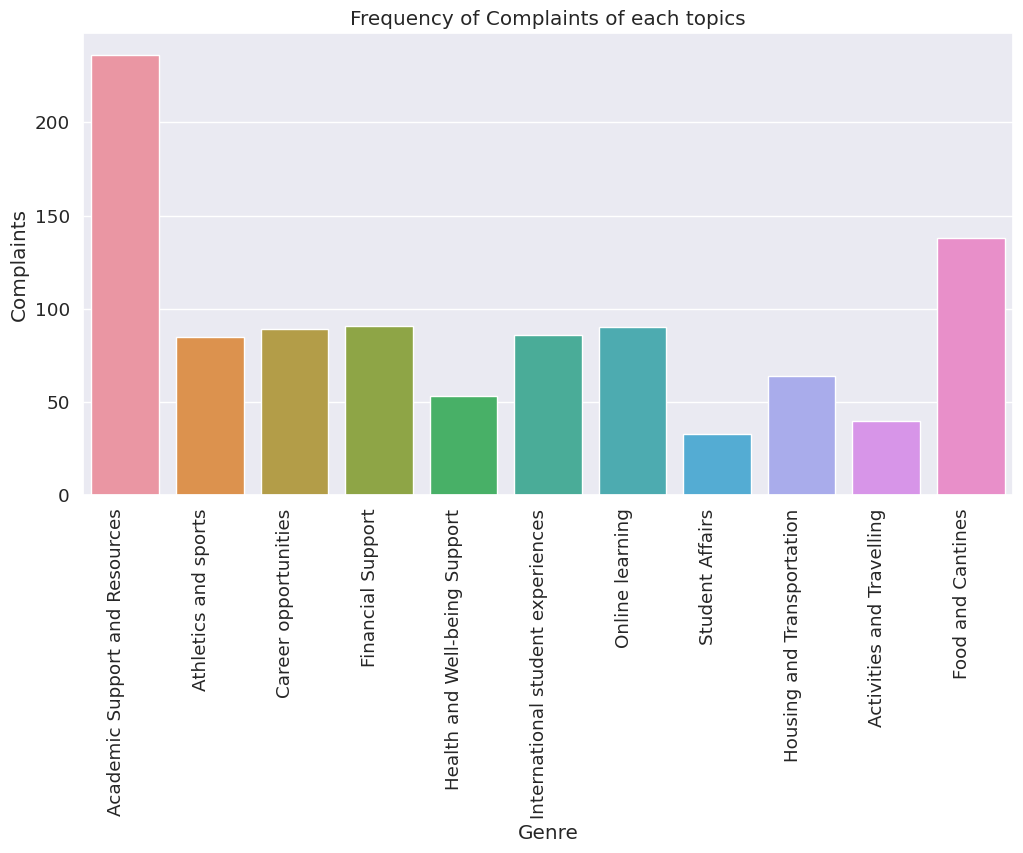

In [ ]:
# Set the figure size and font scale
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.2)

# Create the countplot
sns.countplot(x='Genre', data=df)

# Rotate x-axis labels to make them visible
plt.xticks(rotation=90, ha='right')

# Set title and axis labels
plt.title('Frequency of Complaints of each topics')
plt.xlabel('Genre')
plt.ylabel('Complaints')

plt.show()

Most complaints are from Academic Support and Resources and then Food and Cantines

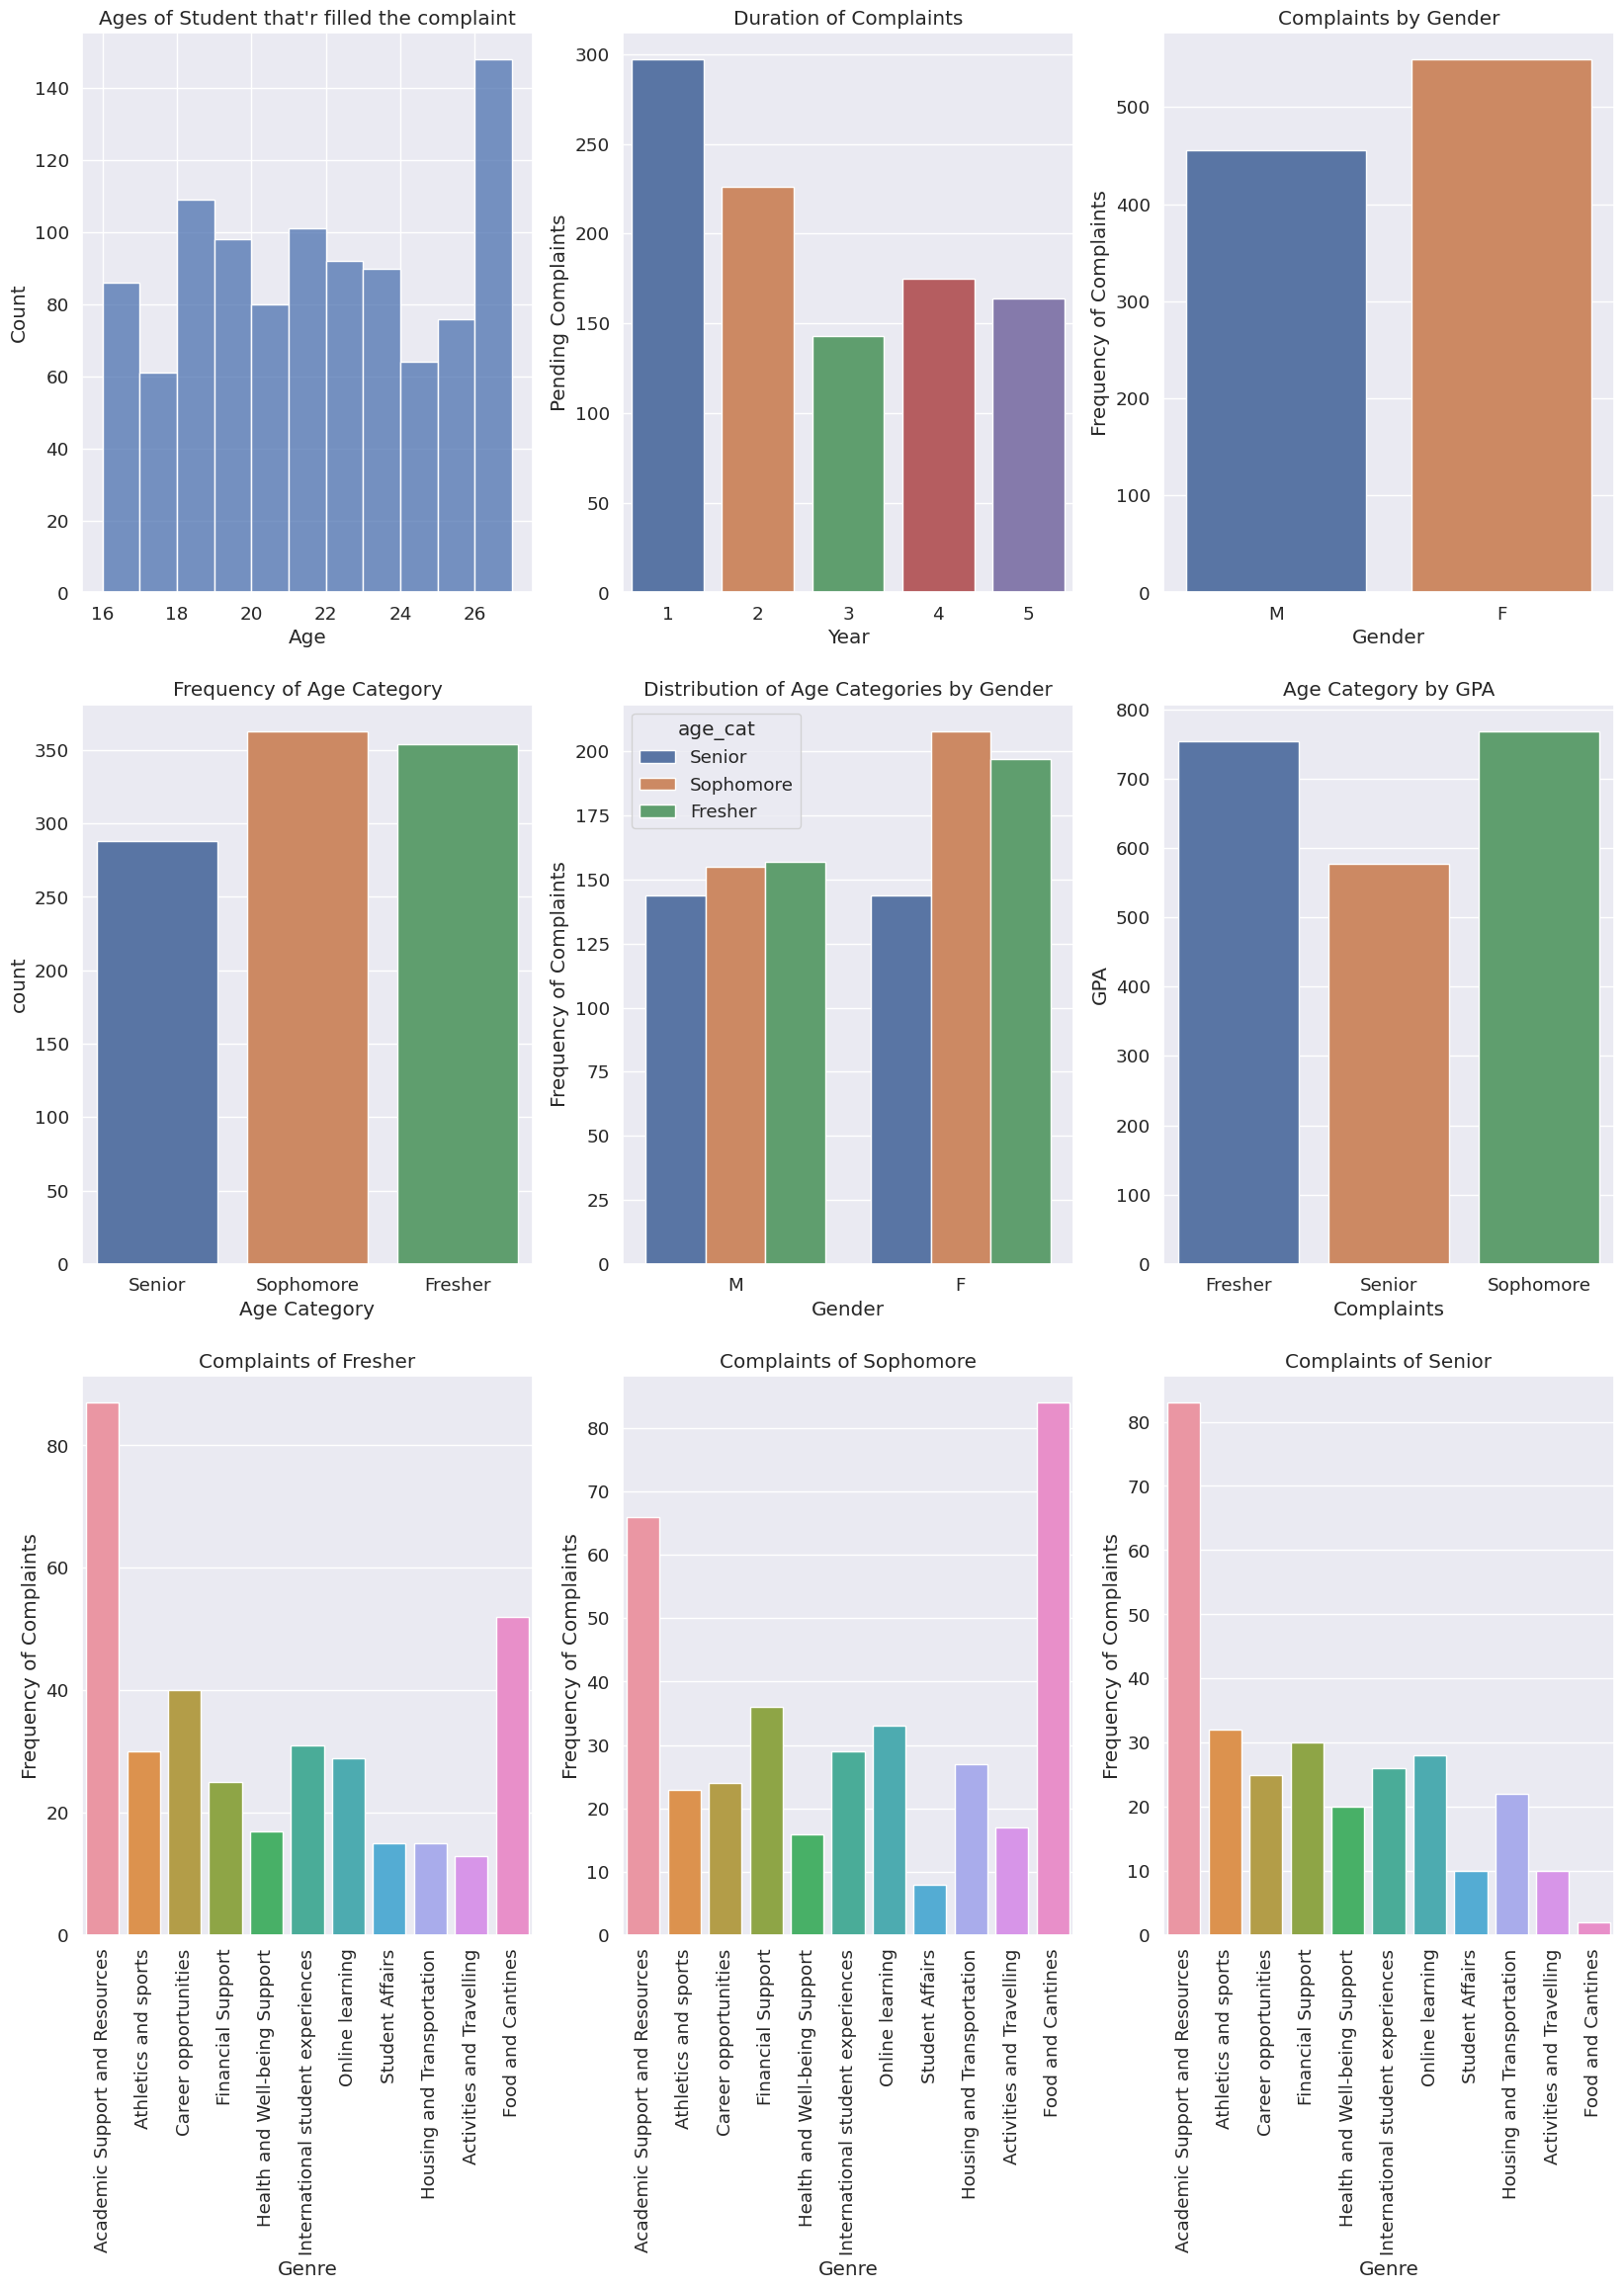

In [ ]:
plt.figure(figsize=(20,25))

plt.subplot(331)
sns.histplot(x=df.Age)
plt.title("Ages of Student that'r filled the complaint")

plt.subplot(332)
sns.countplot(x=df.Year)
plt.title('Duration of Complaints')
plt.ylabel('Pending Complaints')

plt.subplot(333)
sns.countplot(x=df.Gender)
plt.ylabel('Frequency of Complaints')
plt.title('Complaints by Gender')

plt.subplot(334)
sns.countplot(x=df.age_cat)
plt.title('Frequency of Age Category')
plt.xlabel("Age Category")

plt.subplot(335)
sns.countplot(x=df.Gender,hue=df.age_cat)
plt.title("Distribution of Age Categories by Gender")
plt.ylabel('Frequency of Complaints')

plt.subplot(336)
y=df[['age_cat','Gpa']].groupby('age_cat').sum()
sns.barplot(x=y.index,y=y.Gpa)
plt.title('Age Category by GPA')
plt.xlabel('Complaints')
plt.ylabel('GPA')


plt.subplot(337)
sns.countplot(x=df[df.age_cat=="Fresher"]["Genre"])
plt.title('Complaints of Fresher')
plt.ylabel('Frequency of Complaints')
plt.xticks(rotation=90)

plt.subplot(338)
sns.countplot(x=df[df.age_cat=="Sophomore"]["Genre"])
plt.title('Complaints of Sophomore')
plt.ylabel('Frequency of Complaints')
plt.xticks(rotation=90)

plt.subplot(339)
sns.countplot(x=df[df.age_cat=="Senior"]["Genre"])
plt.title('Complaints of Senior')
plt.ylabel('Frequency of Complaints')
plt.xticks(rotation=90)



plt.show()

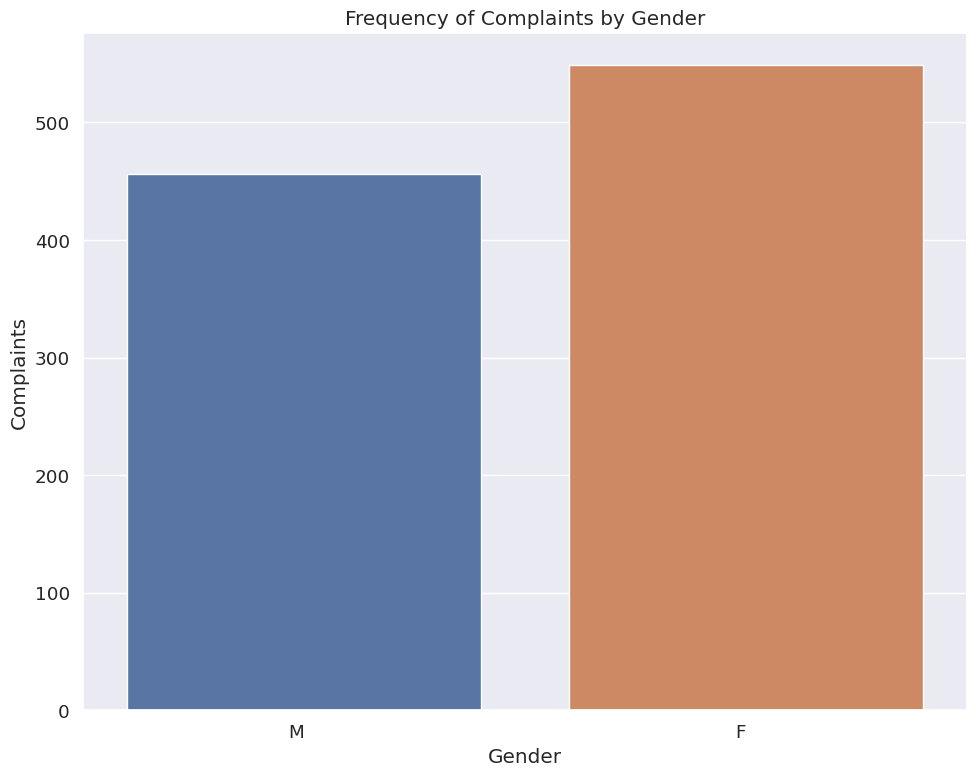

In [ ]:
# Set the figure size and font scale
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.set(font_scale=1.2)

# Create the countplot
sns.countplot(x='Gender', data=df)

# Rotate x-axis labels to make them visible
plt.xticks(rotation=0, ha='right')

# Set title and axis labels
plt.title('Frequency of Complaints by Gender')
plt.xlabel('Gender')
plt.ylabel('Complaints')

# Improve the visibility of the figure
plt.tight_layout()

plt.show()

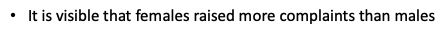

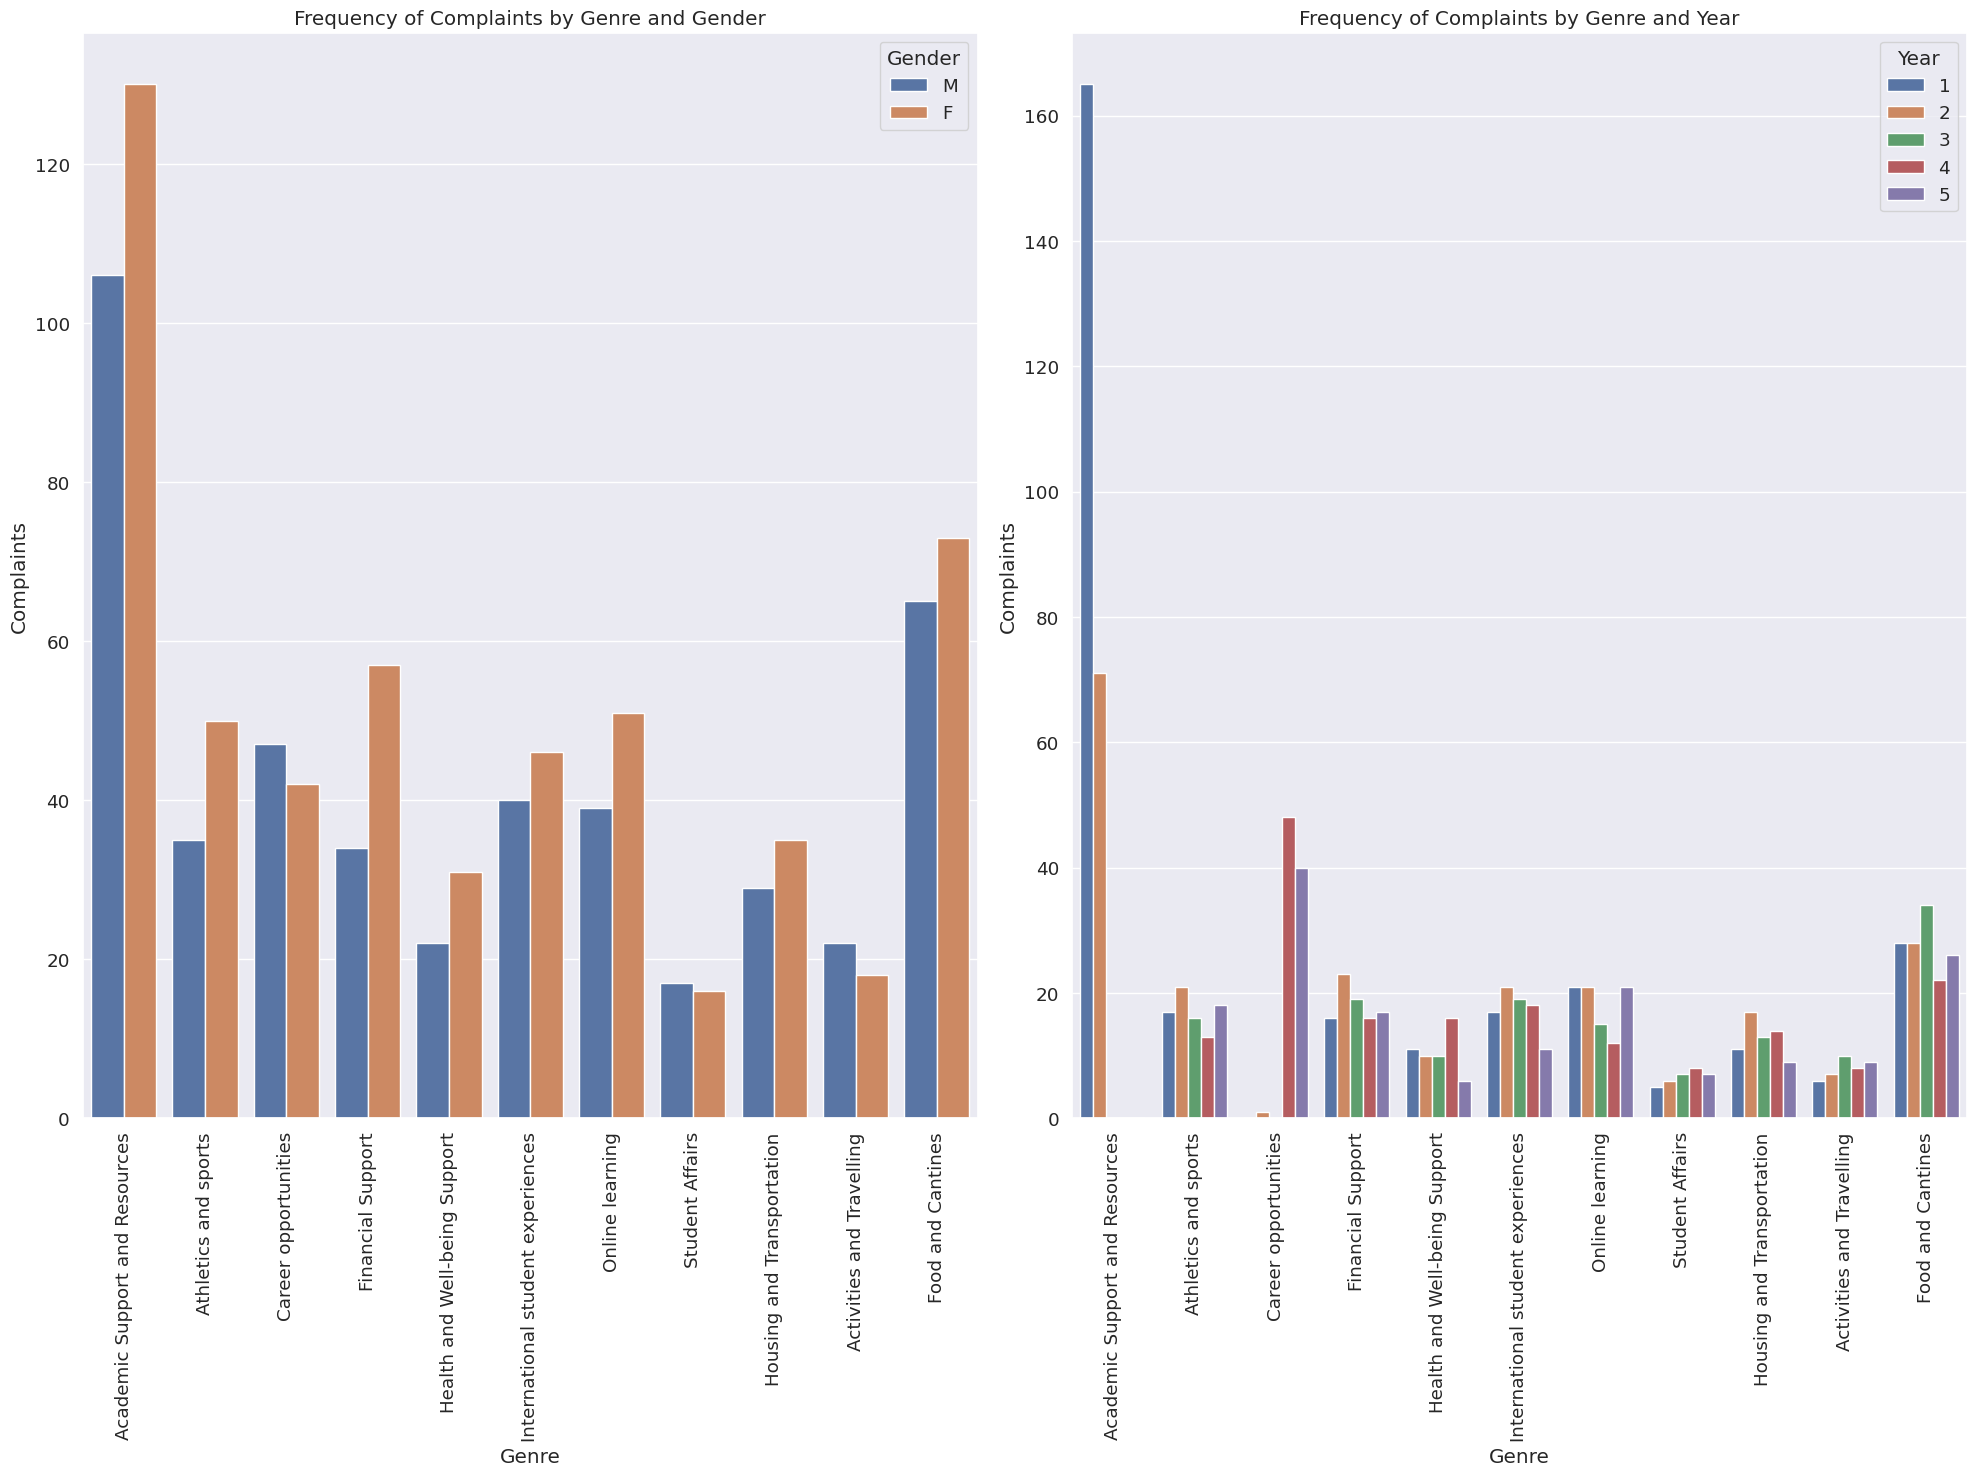

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 15))

# First subplot - countplot with Gender hue
plt.subplot(121)
sns.countplot(data=df, x='Genre', hue='Gender')
plt.xticks(rotation=90)
plt.title('Frequency of Complaints by Genre and Gender')
plt.xlabel('Genre')
plt.ylabel('Complaints')

# Second subplot - countplot with Year hue
plt.subplot(122)
sns.countplot(data=df, x='Genre', hue='Year')
plt.xticks(rotation=90)
plt.title('Frequency of Complaints by Genre and Year')
plt.xlabel('Genre')
plt.ylabel('Complaints')

# Improve the layout and spacing
plt.tight_layout()

plt.show()

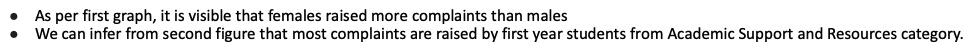

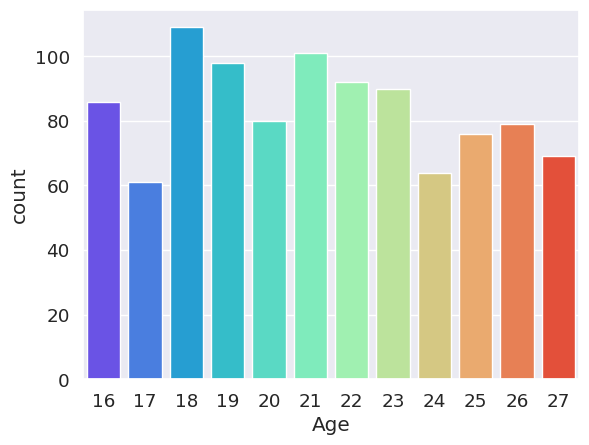

In [ ]:
sns.countplot(data=df, x="Age", palette="rainbow")
sns.set(rc={'figure.figsize':(5,6)})
plt.show()

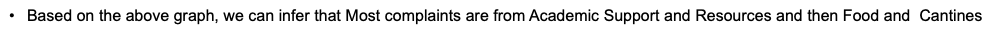

In [ ]:
fig = px.scatter_3d(df, x='Age', y='Gpa',z='Year',
              color='Genre')
fig.show()

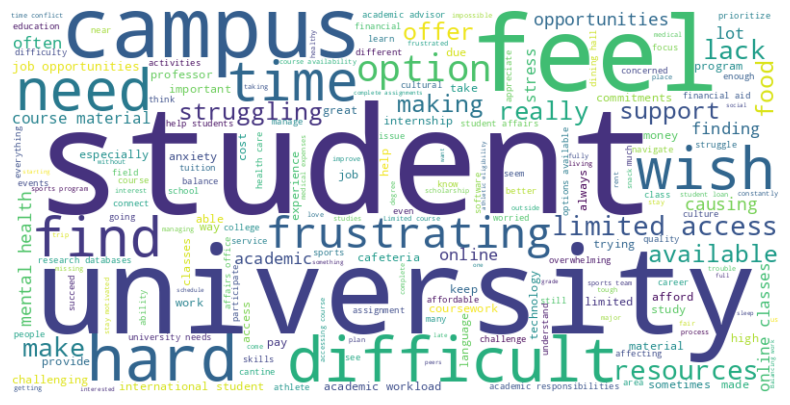

In [ ]:
# Concatenate all the 'Reports' text into a single string
text = " ".join(report for report in df['Reports'])

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In our dataset most words are student,university, campus, feel, difficult, hard etc..

In [ ]:
data= df[['Genre','Reports']]
data

,Genre,Reports
0,Academic Support and Resources,The limited access to research databases and m...
1,Academic Support and Resources,I'm having trouble finding the course material...
2,Academic Support and Resources,It's frustrating to have limited access to res...
3,Academic Support and Resources,I'm really struggling in one of my classes but...
4,Academic Support and Resources,I am really struggling with understanding the...
...,...,...
1000,Food and Cantines,26. I have been unable to find food that meets...
1001,Food and Cantines,27. I have been unable to find food that I can...
1002,Food and Cantines,28. I have been unable to find food that I enjoy.
1003,Food and Cantines,29. I have been unable to find food that is he...


##NLP Preprocessing Techniques

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data

,Genre,Reports
0,Academic Support and Resources,The limited access to research databases and m...
1,Academic Support and Resources,I'm having trouble finding the course material...
2,Academic Support and Resources,It's frustrating to have limited access to res...
3,Academic Support and Resources,I'm really struggling in one of my classes but...
4,Academic Support and Resources,I am really struggling with understanding the...
...,...,...
1000,Food and Cantines,26. I have been unable to find food that meets...
1001,Food and Cantines,27. I have been unable to find food that I can...
1002,Food and Cantines,28. I have been unable to find food that I enjoy.
1003,Food and Cantines,29. I have been unable to find food that is he...


In [ ]:
# Step 1: Lowercase the text
data['Reports'] = data['Reports'].apply(lambda x: x.lower())

<ipython-input-27-0eb48ae6e3d3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Step 2: Remove numbers
data['Reports'] = data['Reports'].apply(lambda x: re.sub(r'\d+', '', x))

<ipython-input-28-55ca8df2dd6e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Step 3: Remove punctuation and special characters
data['Reports'] = data['Reports'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

<ipython-input-29-875346991ff9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Step 4: Tokenize the text (split text into words)
data['Reports'] = data['Reports'].apply(word_tokenize)

<ipython-input-30-93875bfae80e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Step 5: Remove stopwords
stop_words = set(stopwords.words('english'))
data['Reports'] = data['Reports'].apply(lambda x: [word for word in x if word not in stop_words])

<ipython-input-31-6e205ea27301>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data

,Genre,Reports
0,Academic Support and Resources,"[limited, access, research, databases, materia..."
1,Academic Support and Resources,"[im, trouble, finding, course, materials, need..."
2,Academic Support and Resources,"[frustrating, limited, access, research, datab..."
3,Academic Support and Resources,"[im, really, struggling, one, classes, cant, g..."
4,Academic Support and Resources,"[really, struggling, understanding, instructio..."
...,...,...
1000,Food and Cantines,"[unable, find, food, meets, dietary, needs]"
1001,Food and Cantines,"[unable, find, food, afford]"
1002,Food and Cantines,"[unable, find, food, enjoy]"
1003,Food and Cantines,"[unable, find, food, healthy, nutritious]"


In [ ]:
 #Step 6: Lemmatize the words to their base form
lemmatizer = WordNetLemmatizer()
data['Reports'] = data['Reports'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

<ipython-input-33-3e049abdee9a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data

,Genre,Reports
0,Academic Support and Resources,"[limited, access, research, database, material..."
1,Academic Support and Resources,"[im, trouble, finding, course, material, need,..."
2,Academic Support and Resources,"[frustrating, limited, access, research, datab..."
3,Academic Support and Resources,"[im, really, struggling, one, class, cant, get..."
4,Academic Support and Resources,"[really, struggling, understanding, instructio..."
...,...,...
1000,Food and Cantines,"[unable, find, food, meet, dietary, need]"
1001,Food and Cantines,"[unable, find, food, afford]"
1002,Food and Cantines,"[unable, find, food, enjoy]"
1003,Food and Cantines,"[unable, find, food, healthy, nutritious]"


In [ ]:
data.to_csv('input.csv')

##Text Embeddings

In [ ]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Reports'], data['Genre'], test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
X_test = X_test.apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [ ]:
# Now you can proceed with the vectorization code
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

vectorizer_cvec = CountVectorizer()
X_train_cvec = vectorizer_cvec.fit_transform(X_train)
X_test_cvec = vectorizer_cvec.transform(X_test)

##ML Alogorithms

In [ ]:
# Step 3: Define the machine learning algorithms
algorithms = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'SGC_Clsiifier': SGDClassifier(),
    'extratree_classifier' : ExtraTreesClassifier(),
    # Add more algorithms if needed
}

In [ ]:
# Step 4: Train and evaluate each algorithm using Bag of Words
results_cvec = {}
for algorithm_name, algorithm in algorithms.items():
    algorithm.fit(X_train_cvec, y_train)
    y_pred = algorithm.predict(X_test_cvec)
    accuracy_cvec = accuracy_score(y_test, y_pred)
    results_cvec[algorithm_name] = accuracy_cvec

In [ ]:
# Step 5: Train and evaluate each algorithm using TF-IDF
results_tfidf = {}
for algorithm_name, algorithm in algorithms.items():
    algorithm.fit(X_train_tfidf, y_train)
    y_pred = algorithm.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred)
    results_tfidf[algorithm_name] = accuracy_tfidf

# Step 6: Create a DataFrame to display the results
results_df = pd.DataFrame({'Bag of Words': results_cvec, 'TF-IDF': results_tfidf})

# Display the results table
print(results_df)


                         Bag of Words    TF-IDF
Multinomial Naive Bayes      0.920398  0.741294
Random Forest                0.930348  0.930348
SVM                          0.930348  0.910448
Logistic Regression          0.940299  0.895522
SGC_Clsiifier                0.925373  0.930348
extratree_classifier         0.955224  0.950249


##Hypertuning Parameter-Extratree classifer

In [ ]:
#Initialize the ExtraTreeClassifier
classifier = ExtraTreesClassifier()

#Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
#Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(classifier, param_grid, cv=5, n_jobs=-1)


In [ ]:
#Perform hyperparameter tuning
grid_search.fit(X_train_cvec, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [ ]:
#Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
#Predict the genre labels for the testing data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_cvec)

In [ ]:
#Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy:.2f}")

Best Model Accuracy: 0.94


In [ ]:
#Print the classification report for the best model
print(classification_report(y_test, y_pred))

                                   precision    recall  f1-score   support

   Academic Support and Resources       0.89      0.97      0.93        40
        Activities and Travelling       1.00      0.80      0.89         5
             Athletics and sports       1.00      0.96      0.98        23
             Career opportunities       0.95      1.00      0.97        19
                Financial Support       0.83      0.83      0.83        18
                Food and Cantines       1.00      1.00      1.00        29
    Health and Well-being Support       1.00      0.82      0.90        17
       Housing and Transportation       1.00      0.93      0.96        14
International student experiences       0.94      0.94      0.94        17
                  Online learning       0.85      1.00      0.92        11
                  Student Affairs       1.00      0.88      0.93         8

                         accuracy                           0.94       201
                       

##BERT

In [ ]:
X=data['Reports']
print(X)

0       [limited, access, research, database, material...
1       [im, trouble, finding, course, material, need,...
2       [frustrating, limited, access, research, datab...
3       [im, really, struggling, one, class, cant, get...
4       [really, struggling, understanding, instructio...
                              ...                        
1000            [unable, find, food, meet, dietary, need]
1001                         [unable, find, food, afford]
1002                          [unable, find, food, enjoy]
1003            [unable, find, food, healthy, nutritious]
1004                 [unable, find, food, cooked, liking]
Name: Reports, Length: 1005, dtype: object


In [ ]:
X = X.apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 123.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.7 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer, BertModel
import torch

In [ ]:
# Load the pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings
def get_bert_embeddings(text):
    tokens = tokenizer.encode(text, add_special_tokens=True)
    input_ids = torch.tensor(tokens).unsqueeze(0)
    with torch.no_grad():
        model.eval()
        embeddings = model(input_ids)[0]
    return embeddings.squeeze().mean(dim=0).numpy()

In [ ]:
embeddings = [get_bert_embeddings(text) for text in X]
embeddings = torch.tensor(embeddings)

<ipython-input-56-87dba3846090>:2: UserWarning:

Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)



In [ ]:
# Flatten the embeddings matrix to a 2-dimensional format
flattened_embeddings = embeddings.view(embeddings.size(0), -1)

In [ ]:
# Calculate pairwise distances between embeddings
from sklearn.metrics.pairwise import pairwise_distances
pairwise_dist = pairwise_distances(flattened_embeddings, metric='cosine')

In [ ]:
prioritized_indices = pairwise_dist.sum(axis=1).argsort()[::-1]
X_prioritized = X.iloc[prioritized_indices]

In [ ]:
import matplotlib.pyplot as plt

def plot_prioritized_complaints(complaints, title):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(complaints)), complaints['Priority'], color='blue', alpha=0.7)
    plt.xticks(range(len(complaints)), complaints['Complaints'], rotation=45, ha='right', fontsize=8)
    plt.xlabel('Complaints')
    plt.ylabel('Priority')
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [ ]:
# Create a DataFrame with the prioritized complaints and priority scores
df_sorted = pd.DataFrame({'Complaints': X_prioritized, 'Priority': pairwise_dist.sum(axis=1)[prioritized_indices]})


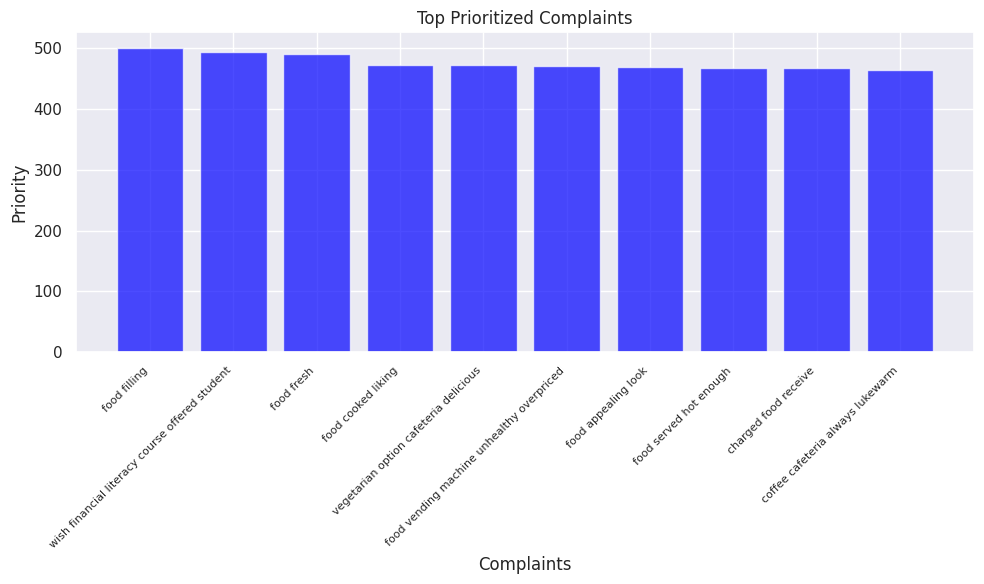

In [ ]:
# Visualize the top-prioritized complaints
top_priors = df_sorted.head(10)  # Get the top 10 prioritized complaints
plot_prioritized_complaints(top_priors, "Top Prioritized Complaints")